<a href="https://colab.research.google.com/github/SYkkk55/Learn-Tensorflow-Keras-Note/blob/main/U4%2BU6%2BU7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# U4
## 1.確認安裝套件 tensorflow 和 keras 
## 2.查看兩者的版本



In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
import keras
keras.__version__

'2.4.3'

# U6 MNIST 手寫數字辨識

# 1.查看資料集 train data 和test data

In [ ]:
import numpy as np 
import pandas as pd 
from keras.utils import np_utils

np.random.seed(10)


In [ ]:
# 匯入資料
from keras.datasets import mnist

In [ ]:
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [ ]:
print('train data= ',len(x_train_image))
print('test data=', len(x_test_image))

train data=  60000
test data= 10000


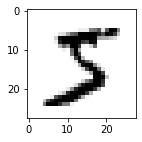

In [ ]:
import matplotlib.pyplot as plt

def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image,cmap='binary')
  plt.show()

plot_image(x_train_image[0])  

In [ ]:
y_train_label[0]

5

In [ ]:
import matplotlib.pyplot as plt 

# 建立函數要來畫多圖的
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): 
  
  # 設定顯示圖形的大小
  fig= plt.gcf()
  fig.set_size_inches(12,14)

  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0,num):

    # 建立子圖形5*5(五行五列)
    ax=plt.subplot(5,5,i+1)

    # 畫出子圖形
    ax.imshow(images[idx],cmap='binary')

    # 標題和label
    title="label=" +str(labels[idx])

    # 如果有傳入預測結果也顯示
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    # 設定子圖形的標題大小
    ax.set_title(title,fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([]);ax.set_yticks([])  
    idx+=1
  plt.show()  

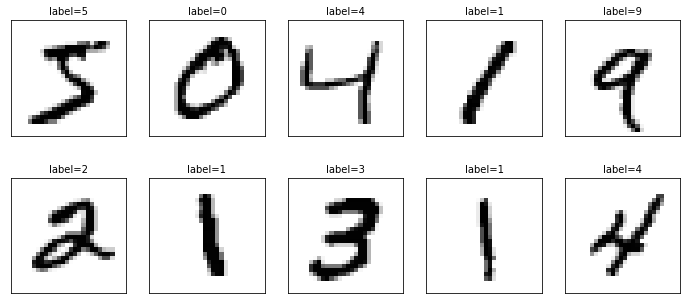

In [ ]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [ ]:
print('x_test_image:',x_test_image.shape)
print('y_test_label:', y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


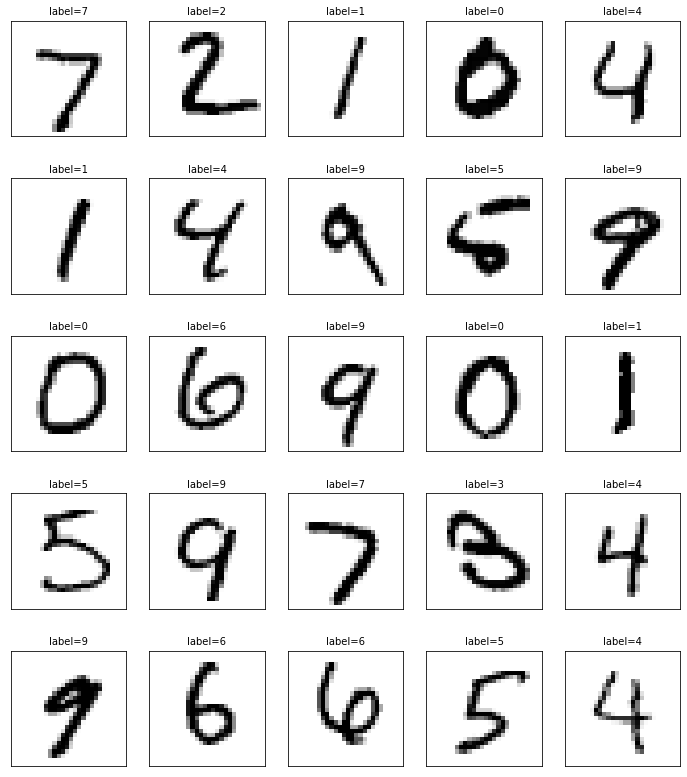

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,25)

# 2.清理資料 data cleaning


# 查看資料的型態
print('x_train_image:', x_train_image.shape)
print('y_train_label:',y_train_label.shape)

In [ ]:
# 代表 train image 總共有6萬張，每一張是28*28的圖片
# label 也有6萬個
# 所以要把二維的圖片矩陣先轉換成一維
# 這裡的784是因為 28*28
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

# 轉換後的資料型態，壓扁變成一維了
print(x_Train.shape)
print(x_Test.shape)

print(x_Train[0])

(60000, 784)
(10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

# 3.影像標準化(normailze)



In [ ]:
# 由於是圖片最大的是255，所以全部除以255

x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

print(x_Train_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# 4.label 前處理 使用one-hot encoding


In [ ]:
# 查看原本的 label 型態
# 他是0~9的數字
y_train_label[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

In [ ]:
# 來看轉換好的
# 這個就是第一筆資料，他是數字5
print(y_TrainOneHot[:1])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# 5.建立模型 多元感知器Multilayer perceptron 模型


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# 建立模型
model = Sequential()

# 建立輸入層和隱藏層
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
# 定義隱藏層神經元個數256
# 輸入為28*28=784 個float 數字
# 使用 normal distribution 常態分布的亂數，初始化 weight權重 bias 偏差
# 定義激活函數為 relu


# 建立輸出層
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
# 定義輸出層為10個 (數字0~9)
# 也是使用常態分佈初始化
# 定義激活函數是 softmax
# 這裡建立的Dense 層，不用設定 input dim ，因為keras 會自動照上一層的256設定

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 從這個 summary 可以看出 這一個模型是兩層的模型
# 然後隱藏層有256個神經元
# 輸出層有10個神經元

# 另外是 param 參數
# 參數的計算方式第一個是 200960=256*784+256
# 另外一個是2570=256*10+10=2570
# 下面有一個全部訓練 total params=200960+2570=203530

# 6.開始訓練


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 模型訓練之前要用 compele 對模型進行設定
# loss 深度學習通常用 cross entropy 交叉嫡，訓練效果較好
# optimizer 設定訓練時依優化的方法，在深度學習使用 adam 最優化方法，最快收斂提高準確度
# metrics 設定評估模型的方式是 accuracy 準確率

In [ ]:
# 開始訓練

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,
            validation_split=0.2,epochs=10,batch_size=200,verbose=2)
# x 是訓練資料
# y 是label 資料
# 設定參數 validation 切0.2起來驗證
# epoch=10 是訓練週期為10
# batch_size=200 每一批訓練200筆資料
# verbose =2 顯示訓練過程

# 所以以上的程式會執行10次
# 每一次執行200筆資料 ，總共訓練資料原本有60000*0.8=48000
# 48000/200=24 要跑240批次
# epoch 每一次訓練週期紀錄結果在 train_history 裡面

Epoch 1/10
240/240 - 1s - loss: 0.4393 - accuracy: 0.8825 - val_loss: 0.2256 - val_accuracy: 0.9380
Epoch 2/10
240/240 - 1s - loss: 0.1897 - accuracy: 0.9460 - val_loss: 0.1633 - val_accuracy: 0.9544
Epoch 3/10
240/240 - 1s - loss: 0.1341 - accuracy: 0.9615 - val_loss: 0.1290 - val_accuracy: 0.9636
Epoch 4/10
240/240 - 1s - loss: 0.1025 - accuracy: 0.9707 - val_loss: 0.1080 - val_accuracy: 0.9695
Epoch 5/10
240/240 - 1s - loss: 0.0805 - accuracy: 0.9775 - val_loss: 0.1033 - val_accuracy: 0.9693
Epoch 6/10
240/240 - 1s - loss: 0.0654 - accuracy: 0.9820 - val_loss: 0.0936 - val_accuracy: 0.9709
Epoch 7/10
240/240 - 1s - loss: 0.0543 - accuracy: 0.9848 - val_loss: 0.0879 - val_accuracy: 0.9726
Epoch 8/10
240/240 - 1s - loss: 0.0450 - accuracy: 0.9882 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 9/10
240/240 - 1s - loss: 0.0381 - accuracy: 0.9899 - val_loss: 0.0840 - val_accuracy: 0.9742
Epoch 10/10
240/240 - 1s - loss: 0.0317 - accuracy: 0.9917 - val_loss: 0.0834 - val_accuracy: 0.9745

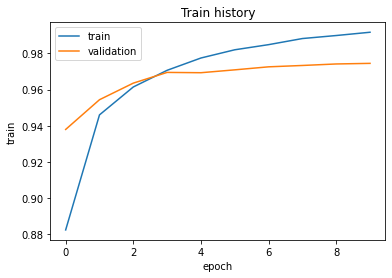

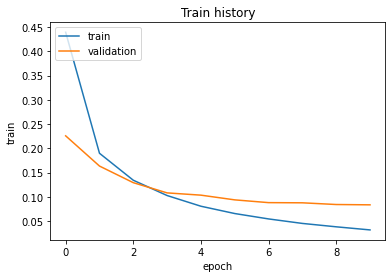

In [ ]:
# 來把訓練過程畫出來

import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

# 7.評估測試資料準確率


In [ ]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9783

accuracy 0.9782999753952026


# 8.執行預測

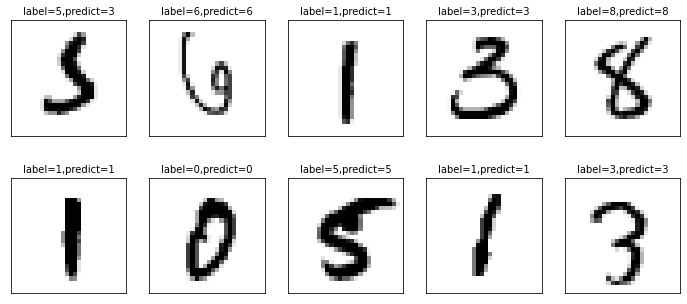

In [ ]:
prediction=model.predict_classes(x_Test)
prediction

plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

# 9.顯示混淆矩陣 confussion table

In [ ]:
import pandas as pd

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,1,2,3,0,1,1,1,2
1,0,1124,4,0,0,0,3,0,4,0
2,7,2,1002,5,2,0,2,5,7,0
3,0,0,1,1000,0,2,0,3,2,2
4,0,0,2,0,954,0,4,2,0,20
5,2,0,0,13,1,863,4,1,6,2
6,6,2,2,1,4,2,939,0,2,0
7,1,5,8,5,1,0,0,994,1,13
8,5,0,1,15,2,3,3,2,940,3


In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
1670,5,3
2035,5,3
3117,5,3
3902,5,3
3968,5,3
4271,5,3
4355,5,3
5913,5,3


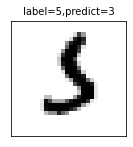

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

# 10. 隱藏層增加為1000個神經元


In [ ]:
model= Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 5s - loss: 2.0097 - accuracy: 0.7506 - val_loss: 1.6886 - val_accuracy: 0.9042
Epoch 2/10
240/240 - 4s - loss: 1.4959 - accuracy: 0.9113 - val_loss: 1.3095 - val_accuracy: 0.9243
Epoch 3/10
240/240 - 4s - loss: 1.1737 - accuracy: 0.9240 - val_loss: 1.0362 - val_accuracy: 0.9294
Epoch 4/10
240/240 - 4s - loss: 0.9351 - accuracy: 0.9306 - val_loss: 0.8332 - val_accuracy: 0.9339
Epoch 5/10
240/240 - 4s - loss: 0.7582 - accuracy: 0.9350 - val_loss: 0.6831 - val_accuracy: 0.9359
Epoch 6/10
240/240 - 4s - loss: 0.6279 - accuracy: 0.9384 - val_loss: 0.5744 - val_accuracy: 0.9377
Epoch 7/10
240/240 - 4s - loss: 0.5322 - accuracy: 0.9407 - val_loss: 0.4945 - val_accuracy: 0.9392
Epoch 8/10
240/240 - 4s - loss: 0.4608 - accuracy: 0.9428 - val_loss: 0.4356 - val_accuracy: 0.9416
Epoch 9/10
240/240 - 5s - loss: 0.4065 - accuracy: 0.9451 - val_loss: 0.3904 - val_accuracy: 0.9410
Epoch 10/10
240/240 - 5s - loss: 0.3651 - accuracy: 0.9467 - val_loss: 0.3544 - val_accuracy: 0.9436

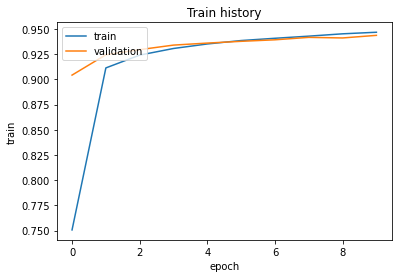

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

# 11.加入 dropout 避免overfitting

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# 主要加入這個 dropout
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/20
240/240 - 5s - loss: 2.0613 - accuracy: 0.5686 - val_loss: 1.7545 - val_accuracy: 0.8627
Epoch 2/20
240/240 - 5s - loss: 1.6370 - accuracy: 0.5691 - val_loss: 1.3783 - val_accuracy: 0.9168
Epoch 3/20
240/240 - 5s - loss: 1.4488 - accuracy: 0.5676 - val_loss: 1.1567 - val_accuracy: 0.9285
Epoch 4/20
240/240 - 5s - loss: 1.3653 - accuracy: 0.5804 - val_loss: 1.0237 - val_accuracy: 0.9315
Epoch 5/20
240/240 - 5s - loss: 1.2858 - accuracy: 0.6106 - val_loss: 0.9169 - val_accuracy: 0.9314
Epoch 6/20
240/240 - 5s - loss: 1.2143 - accuracy: 0.6278 - val_loss: 0.8195 - val_accuracy: 0.9293
Epoch 7/20
240/240 - 5s - loss: 1.1552 - accuracy: 0.6370 - val_loss: 0.7338 - val_accuracy: 0.9302
Epoch 8/20
240/240 - 5s - loss: 1.1018 - accuracy: 0.6459 - val_loss: 0.6671 - val_accuracy: 0.9317
Epoch 9/20
240/240 - 5s - loss: 1.0745 - accuracy: 0.6706 - val_loss: 0.6169 - val_accuracy: 0.9326
Epoch 10/20
240/240 - 5s - loss: 1.0472 - accuracy: 0.6770 - val_loss: 0.5813 - val_accuracy: 0.9333

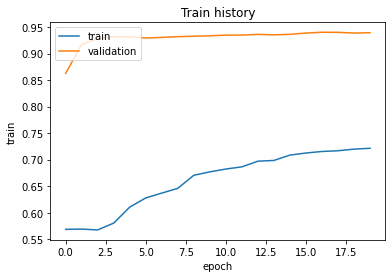

In [ ]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=20,batch_size=200,verbose=2)
show_train_history(train_history,'accuracy','val_accuracy')

In [ ]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.9363

accuracy 0.9362999796867371


# 12.建立多層感知模型包含2 個隱藏層

Consider rewriting this model with the Functional API.
Epoch 1/20
240/240 - 5s - loss: 0.5850 - accuracy: 0.8130 - val_loss: 0.2315 - val_accuracy: 0.9328
Epoch 2/20
240/240 - 5s - loss: 0.3419 - accuracy: 0.8956 - val_loss: 0.1558 - val_accuracy: 0.9568
Epoch 3/20
240/240 - 5s - loss: 0.2691 - accuracy: 0.9163 - val_loss: 0.1321 - val_accuracy: 0.9625
Epoch 4/20
240/240 - 5s - loss: 0.2266 - accuracy: 0.9286 - val_loss: 0.1179 - val_accuracy: 0.9641
Epoch 5/20
240/240 - 5s - loss: 0.2068 - accuracy: 0.9348 - val_loss: 0.1019 - val_accuracy: 0.9691
Epoch 6/20
240/240 - 5s - loss: 0.1895 - accuracy: 0.9397 - val_loss: 0.0965 - val_accuracy: 0.9707
Epoch 7/20
240/240 - 5s - loss: 0.1755 - accuracy: 0.9452 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 8/20
240/240 - 5s - loss: 0.1627 - accuracy: 0.9482 - val_loss: 0.0875 - val_accuracy: 0.9732
Epoch 9/20
240/240 - 5s - loss: 0.1575 - accuracy: 0.9500 - val_loss: 0.0851 - val_accuracy: 0.9740
Epoch 10/20
240/240 - 5s - loss: 0.1487 - acc

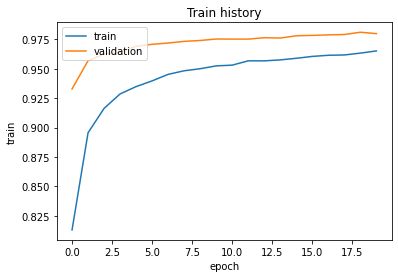

313/313 [==============================] - 1s 3ms/step - loss: 0.0622 - accuracy: 0.9801

accuracy 0.9800999760627747
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_16 (Dense)             multiple                  785000    
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_17 (Dense)             multiple                  10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model = Sequential()

model(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))


# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=20,batch_size=200,verbose=2)
show_train_history(train_history,'accuracy','val_accuracy')

scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])

print(model.summary())

# 結論

## 多層感知器 Multilayer perceptron 模型，辨識手寫字
## 嘗試將模型加寬加深，加入 drop 以提高準確度，避免 overfitting
## 但多層感知器有其極限，若要提高準確度，就要使用卷積神經網路 CNN

